<a href="https://colab.research.google.com/github/Kai-Tsumoto/test/blob/master/Report2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

演習課題⓪ ニューロン数Nと記憶パターン数p，Mを設定

In [39]:
NUM_OVERLAP = 15

# 0. define parameters
N = 1000 # # of neurons
P = 110  # # of loading patterns
M = np.linspace(0.1, 1, num=NUM_OVERLAP) # initial overlap
ITER = 20

print(M)

#オーダーパラメーターmsは，初期値の設定の変化する数NUM_OVERLAPとタイムステップITERの行列として設定
ms2 = np.zeros((NUM_OVERLAP, ITER))


[0.1        0.16428571 0.22857143 0.29285714 0.35714286 0.42142857
 0.48571429 0.55       0.61428571 0.67857143 0.74285714 0.80714286
 0.87142857 0.93571429 1.        ]


演習課題⑤ (演習課題①から④を用いて)

In [0]:
for i in range(NUM_OVERLAP):
    ###①から④は同じ
    ###③のところで初期値の設定(M)を変化させる。

    ### ①　記憶パターンをランダムに発生
    xi = np.random.randint(2, size=(P,N))
    xi[xi == 0] = -1

    ### ②　相互作用を生成
    J = np.dot(xi.T, xi) / N
    J = J - np.diag(np.diag(J)) ##自分自身との結合強度は引いてゼロにする

    ### ③　ニューロンの初期値を設定
    ### Mをiによって変化させるようにする。
    prb_x0 =  (1+M[i]*xi)/2 ##発火確率の設定 
    filter_  = np.random.random(size=(P,N)) ##0から1まで値域をもつ1×Nの一様ランダム行列を生成 
              ## filter_.shape: (1, N)
    
    ### 初期の発火状態x0を、prb_x0とfilter_との大小関係で設定する
    x0 = np.zeros((P, N))  ## x0.shape: (1, N)
    x0[prb_x0 >= filter_] = 1
    x0[prb_x0 < filter_]  =  -1
    x = x0.T  ## x.shape: (N, 1)

    ### ④　ニューロンの更新と1番目の記憶パターンとのオーバーラップ
    ###オーダーパラメーターmsを計算する
    ##内積によって、オーダーパラメータの初期値を計算
    ms2[i , 0]=((xi*x.T).sum())/(N*P)
    ### ニューロンの状態の更新 
    
    t = 0
    while t < ITER:
        ### sgnの中身(input)の計算
        input =   np.dot(J,x) ## (N, N) @ (N, 1) -> (N, 1)
        
        ### sgnをinputを入力として計算し、ニューロンの状態を更新
        x[input >= 0] =1
        x[input < 0]  = -1
        
        ###内積によって、オーダーパラメータの初期値を計算
        ms2[i, t] = ((xi*x.T).sum())/(N*P)
        t = t + 1

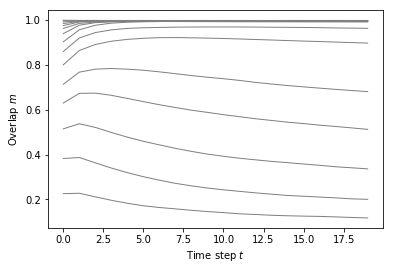

In [41]:
## plot
for i in range(NUM_OVERLAP):
    plt.plot(ms2[i, :], color='gray', lw=1)
    plt.xlabel('Time step $t$')
    plt.ylabel('Overlap $m$')

In [0]:
# save csv file  
# ファイルを保存
np.savetxt('ms2.csv', ms2, delimiter=',')
from google.colab import files
files.download('ms2.csv')